In [180]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [181]:
df = pd.read_csv('train.csv')

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [183]:
df.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [184]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [185]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [186]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [187]:
p=df.isnull().sum()/len(df)*100
new = pd.concat([df.isnull().sum(), p],axis=1,keys=['Total','%'])
new

,Total,%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


we drop PassengerId and cabin 
we fill other missing values with mean or median 

In [188]:
df.drop(columns={'PassengerId'},axis=1,inplace=True)

In [189]:
df.drop(columns={'Cabin','Ticket'},inplace=True)

In [190]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)   

In [191]:
mean = df.groupby(['Sex'])['Age'].transform('mean')
df['Age'] = df['Age'].fillna(mean)

In [192]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

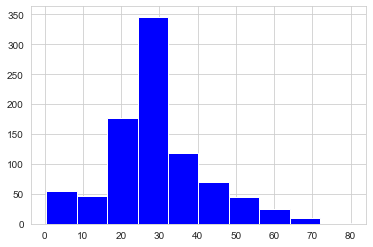

In [193]:
plt.hist(df['Age'],color='blue')
plt.show()

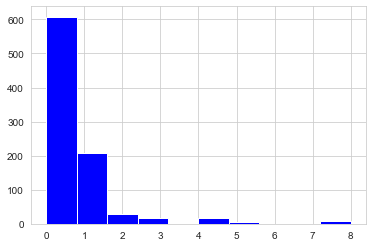

In [194]:
plt.hist(df['SibSp'],color='blue')
plt.show()

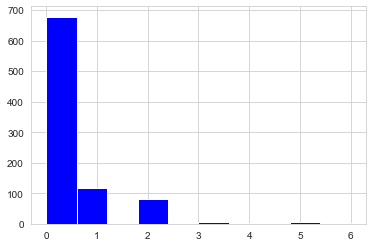

In [195]:
plt.hist(df['Parch'],color='blue')
plt.show()

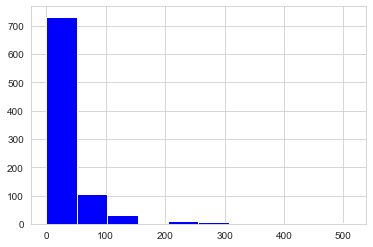

In [196]:
plt.hist(df['Fare'],color='blue')
plt.show()

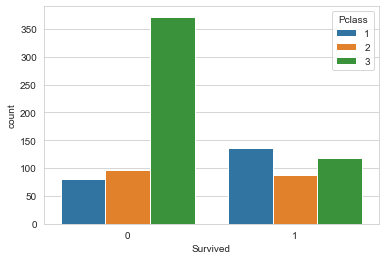

In [197]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue=df['Pclass'],data=df)   
plt.show()

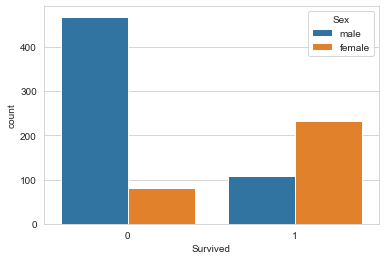

In [198]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue=df['Sex'],data=df)   
plt.show()

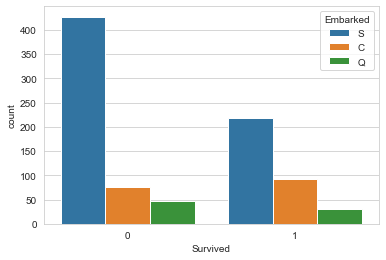

In [199]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue=df['Embarked'],data=df)   
plt.show()

<AxesSubplot:>

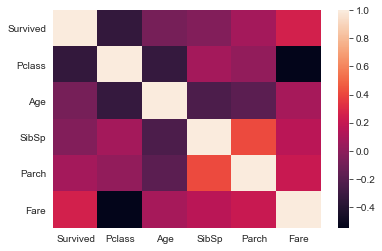

In [200]:
df.corr()
sns.heatmap(df.corr())

We already saw in the previous titanic checkpoint that Pclass, sex and embarked are the chosen features, we're going to study them a bit more

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

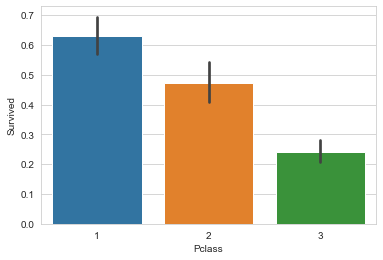

In [201]:
sns.barplot(x='Pclass' , y='Survived' , data=df)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

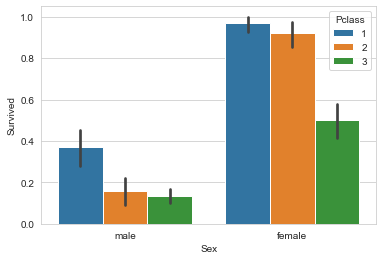

In [202]:
sns.barplot(x='Sex', y='Survived' , hue='Pclass' , data=df)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

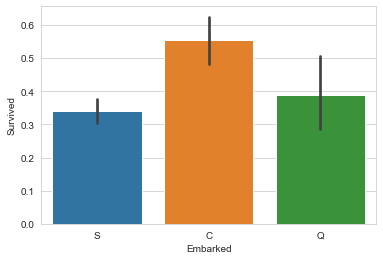

In [203]:
sns.barplot(x='Embarked' , y='Survived' , data=df)

In [204]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embarked = pd.get_dummies(df['Embarked'],drop_first=True)
df.drop(['Sex','Embarked','Name'],axis=1,inplace=True)
df = pd.concat([df,sex,embarked],axis=1)
df.head(20)


,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.000000,1,0,7.2500,1,0,1
1,1,1,38.000000,1,0,71.2833,0,0,0
2,1,3,26.000000,0,0,7.9250,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,1
5,0,3,30.726645,0,0,8.4583,1,1,0
6,0,1,54.000000,0,0,51.8625,1,0,1
7,0,3,2.000000,3,1,21.0750,1,0,1
8,1,3,27.000000,0,2,11.1333,0,0,1
9,1,2,14.000000,1,0,30.0708,0,0,0


In [218]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1),df['Survived'],  test_size=0.2, random_state=2)


from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

pipe.score(X_test, y_test)

In [229]:
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [230]:
predictions = model.predict(X_test)


In [231]:
accuracy=confusion_matrix(y_test,predictions)
accuracy

array([[91,  9],
       [30, 49]], dtype=int64)

In [232]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7821229050279329

In [225]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [226]:
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [227]:
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=2)

In [228]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]

In [214]:
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

LogisticRegression()

In [215]:
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

In [216]:
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.903


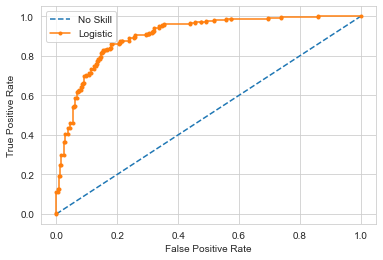

In [217]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
